## **MACHINE LEARNING LAB 3**

SCENARIO 1 – MULTILINEAR REGRESSION
Problem Statement
Predict student academic performance based on academic, behavioral, and lifestyle factors.
Dataset (Kaggle – Public)
https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
Target Variable
• Final Exam Score (Average of Math, Reading, Writing)
Input Features
• Study hours per day
• Attendance percentage
• Parental education level (encoded)
• Test preparation course (encoded)
• Sleep hours

IN-LAB TASKS (Multilinear Regression)
1. Import required Python libraries.
2. Load the student performance dataset.
3. Perform data preprocessing and encoding of categorical features.
4. Select multiple input features and compute the target variable.
5. Handle missing values using suitable imputation.
6. Apply feature scaling.
7. Split the dataset into training and testing sets.
8. Train a Multilinear Regression model.
9. Predict student performance for test data.
10. Evaluate performance using:
• MSE
• RMSE
• R² Score
11. Analyze regression coefficients to interpret feature influence.
12. Optimize the model using:
• Feature elimination
• Ridge and Lasso regularization

Visualization
• Predicted vs Actual exam scores
• Coefficient magnitude comparison
• Residual distribution plot

SREENIDHI - 24BAD114
MODEL EVALUATION
MSE  : 195.1043255196614
RMSE : 13.967974997101813
R2   : 0.08985655480948895

REGRESSION COEFFICIENTS
                                         Feature  Coefficient
0                                    Study_Hours     0.335769
1                                     Attendance    -0.286378
2                                    Sleep_Hours     0.785838
3  parental level of education_bachelor's degree     0.988247
4        parental level of education_high school    -2.139190
5    parental level of education_master's degree     0.518838
6       parental level of education_some college    -0.330461
7   parental level of education_some high school    -1.417047
8                   test preparation course_none    -3.694906

R2 AFTER FEATURE ELIMINATION : -0.002983640933996945
R2 RIDGE : 0.08983514380516489
R2 LASSO : 0.08819642237283198


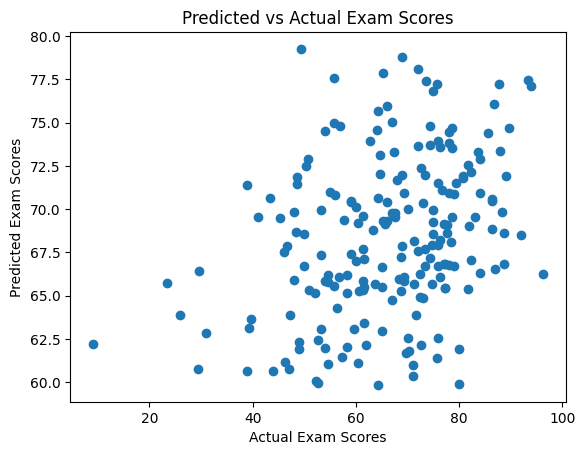

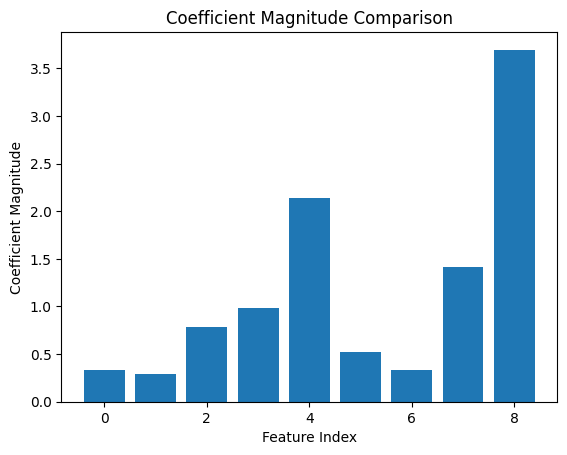

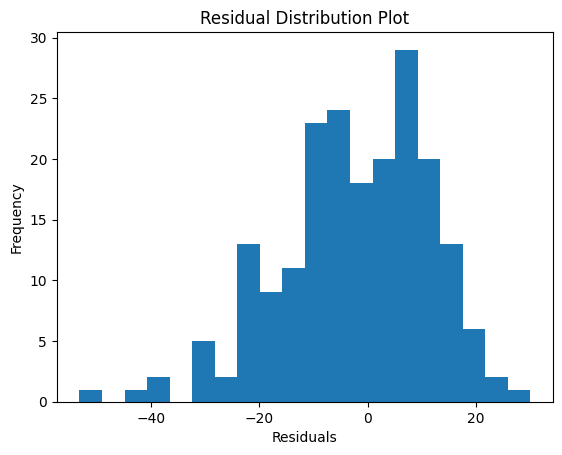

In [1]:
print("SREENIDHI - 24BAD114")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

df = pd.read_csv("/content/StudentsPerformance.csv")

np.random.seed(42)

df["Study_Hours"] = np.random.randint(1, 6, len(df))
df["Attendance"] = np.random.randint(60, 100, len(df))
df["Sleep_Hours"] = np.random.randint(5, 9, len(df))

df["Final_Score"] = (df["math score"] + df["reading score"] + df["writing score"]) / 3

df = pd.get_dummies(df,
                    columns=["parental level of education",
                             "test preparation course"],
                    drop_first=True)

features = ["Study_Hours", "Attendance", "Sleep_Hours"] + \
           [col for col in df.columns
            if "parental level of education_" in col or
               "test preparation course_" in col]

X = df[features]
y = df["Final_Score"]

imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MODEL EVALUATION")
print("MSE  :", mse)
print("RMSE :", rmse)
print("R2   :", r2)

coef_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": model.coef_
})

print("\nREGRESSION COEFFICIENTS")
print(coef_df)

X_reduced = X[:, :3]

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42)

model_reduced = LinearRegression()
model_reduced.fit(X_train_r, y_train_r)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

print("\nR2 AFTER FEATURE ELIMINATION :",
      r2_score(y_test_r, model_reduced.predict(X_test_r)))

print("R2 RIDGE :", r2_score(y_test, ridge.predict(X_test)))
print("R2 LASSO :", r2_score(y_test, lasso.predict(X_test)))

plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Predicted vs Actual Exam Scores")
plt.show()

plt.figure()
plt.bar(range(len(model.coef_)), abs(model.coef_))
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Magnitude")
plt.title("Coefficient Magnitude Comparison")
plt.show()

residuals = y_test - y_pred

plt.figure()
plt.hist(residuals, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution Plot")
plt.show()


SCENARIO 2 – POLYNOMIAL REGRESSION
Problem Statement
Predict vehicle fuel efficiency based on engine characteristics where the relationship is non-linear.
Dataset (Kaggle – Public)
https://www.kaggle.com/datasets/uciml/autompg-dataset
Target Variable
• Miles Per Gallon (MPG)
Input Feature
• Engine Horsepower

IN-LAB TASKS (Polynomial Regression)
1. Import required Python libraries.
2. Load and clean the Auto MPG dataset.
3. Select horsepower as the independent variable.
4. Handle missing values.
5. Generate polynomial features for degrees 2, 3, and 4.
6. Apply feature scaling.
7. Split the dataset into training and testing sets.
8. Train Polynomial Regression models with different degrees.
9. Predict fuel efficiency values.
10. Evaluate each model using:
o MSE
o RMSE
o R² Score
11. Compare model performance across polynomial degrees.
12. Apply Ridge regression to control overfitting.

Visualization
• Polynomial curve fitting for different degrees
• Training vs Testing error comparison
• Overfitting and underfitting demonstration

SREENIDHI - 24BAD114
MODEL PERFORMANCE FOR DIFFERENT POLYNOMIAL DEGREES

DEGREE 2
MSE  : 13.760855128148345
RMSE : 3.709562659957147
R2   : 0.7440623896917427

DEGREE 3
MSE  : 13.813374257350006
RMSE : 3.7166348027954004
R2   : 0.7430855884466042

DEGREE 4
MSE  : 14.11802402282965
RMSE : 3.757395909779757
R2   : 0.7374194192854786

RIDGE REGRESSION (DEGREE 4)
MSE  : 14.013043715614163
RMSE : 3.743400020785137
R2   : 0.7393719439438626


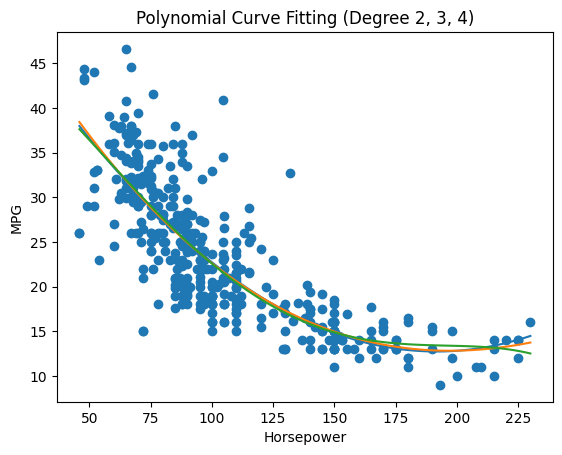

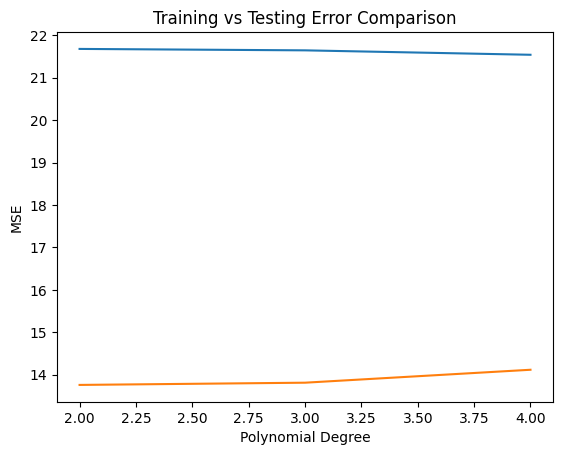

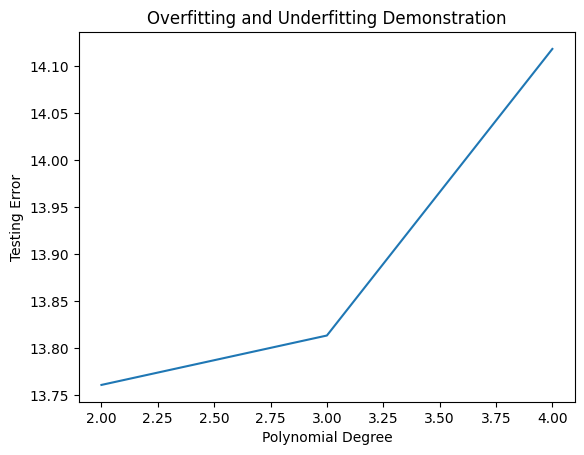

In [2]:
print("SREENIDHI - 24BAD114")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

df = pd.read_csv("/content/auto-mpg.csv")

df.replace("?", np.nan, inplace=True)
df["horsepower"] = pd.to_numeric(df["horsepower"])
df["horsepower"] = df["horsepower"].fillna(df["horsepower"].mean())

X = df[["horsepower"]]
y = df["mpg"]

imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

degrees = [2, 3, 4]

train_errors = []
test_errors = []

print("MODEL PERFORMANCE FOR DIFFERENT POLYNOMIAL DEGREES\n")

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    train_errors.append(train_mse)
    test_errors.append(test_mse)

    print("DEGREE", d)
    print("MSE  :", test_mse)
    print("RMSE :", np.sqrt(test_mse))
    print("R2   :", r2_score(y_test, y_test_pred))
    print()

poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_poly, y_train)
ridge_pred = ridge.predict(X_test_poly)

print("RIDGE REGRESSION (DEGREE 4)")
print("MSE  :", mean_squared_error(y_test, ridge_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_test, ridge_pred)))
print("R2   :", r2_score(y_test, ridge_pred))


plt.figure()

x_original = scaler.inverse_transform(X)
x_range = np.linspace(x_original.min(), x_original.max(), 100).reshape(-1,1)
x_range_scaled = scaler.transform(x_range)

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    y_curve = model.predict(poly.transform(x_range_scaled))
    plt.plot(x_range, y_curve)

plt.scatter(x_original, y)
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Polynomial Curve Fitting (Degree 2, 3, 4)")
plt.show()


plt.figure()
plt.plot(degrees, train_errors)
plt.plot(degrees, test_errors)
plt.xlabel("Polynomial Degree")
plt.ylabel("MSE")
plt.title("Training vs Testing Error Comparison")
plt.show()


plt.figure()
plt.plot(degrees, test_errors)
plt.xlabel("Polynomial Degree")
plt.ylabel("Testing Error")
plt.title("Overfitting and Underfitting Demonstration")
plt.show()
